<a href="https://colab.research.google.com/github/sushrut88/Machine-Learning-Lab/blob/main/practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [95]:
df=pd.read_csv("customer_purchase_data.csv")

In [96]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [97]:
df.shape

(1500, 9)

In [98]:
df["PurchaseStatus"].value_counts()

,count
PurchaseStatus,
0,852
1,648


In [99]:
df.isnull().sum()


,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [100]:
import numpy as np
def remove_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

data = remove_outliers(df)
print(data.head())


   Age  Gender   AnnualIncome  ...  LoyaltyProgram  DiscountsAvailed  PurchaseStatus
0   40       1   66120.267939  ...               0                 5               1
1   20       1   23579.773583  ...               0                 5               0
2   27       1  127821.306432  ...               1                 0               1
3   24       1  137798.623120  ...               0                 4               1
4   31       1   99300.964220  ...               0                 0               1

[5 rows x 9 columns]


In [101]:
data.shape

(1500, 9)

In [102]:
X=df.drop("PurchaseStatus",axis=1)
y=df["PurchaseStatus"]

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=6)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [128]:
model.score(X_test,y_test)

0.9366666666666666

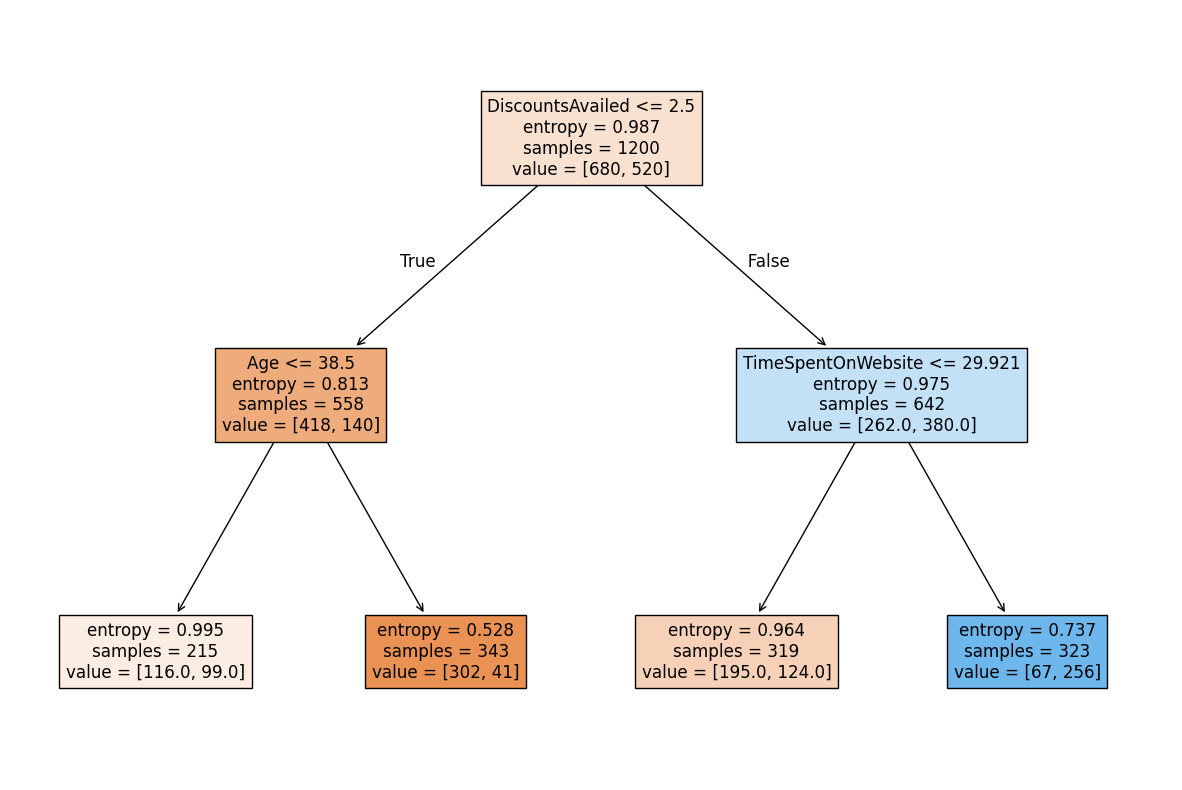

In [126]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=X.columns,filled=True)
plt.show()

In [107]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[166   6]
 [ 14 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       172
           1       0.95      0.89      0.92       128

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



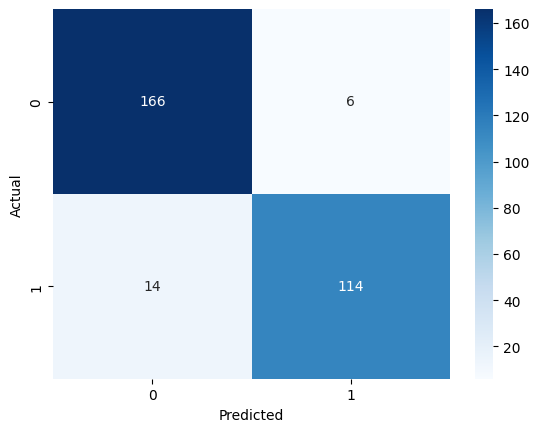

In [120]:
sns.heatmap(conf_matrix,annot=True,cmap="Blues",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

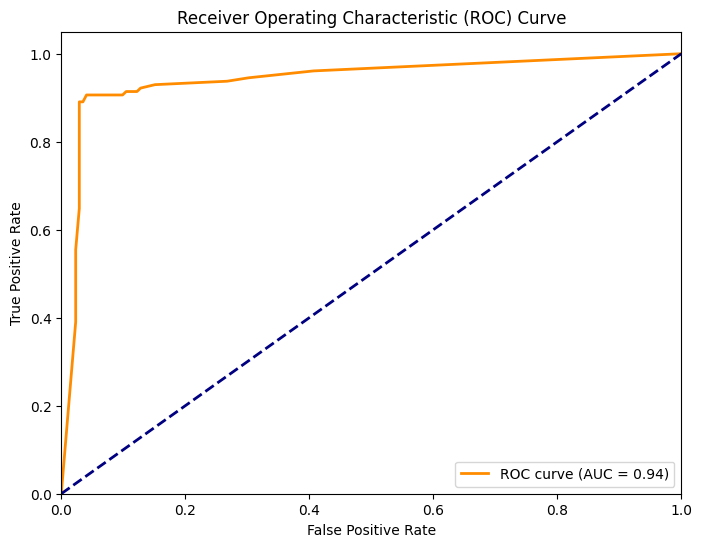

In [123]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
